### The code below is everything learned by me in the introductory course 'neural networks & deep learning' taught by Andrew Ng in deep learning specialization by 'deeplearning.ai'

the model made is not well optimized but can be better tuned to handle problems of high bias and overfitting!

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import Image

%matplotlib inline

In [ ]:
print("Tensorflow Version:",tf.__version__)
print("GPU","Available" if tf.config.list_physical_devices("GPU") else "Not Available!")

Tensorflow Version: 2.3.0
GPU Available


Kaggle "dogs-vs-cats" [dataset](https://www.kaggle.com/c/dogs-vs-cats/data)

In [ ]:
#!unzip "/content/drive/My Drive/cats-dogs/dogs-vs-cats.zip" -d "/content/drive/My Drive/cats-dogs"

Archive:  /content/drive/My Drive/cats-dogs/dogs-vs-cats.zip
  inflating: /content/drive/My Drive/cats-dogs/sampleSubmission.csv  
  inflating: /content/drive/My Drive/cats-dogs/test1.zip  
  inflating: /content/drive/My Drive/cats-dogs/train.zip  


In [ ]:
#!unzip "/content/drive/My Drive/cats-dogs/test1.zip" -d "/content/drive/My Drive/cats-dogs"
#!unzip "/content/drive/My Drive/cats-dogs/train.zip" -d "/content/drive/My Drive/cats-dogs"

# Building L-layer Neural Network Architecture From Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Initialize parameters 

In [ ]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

## Forward propagation

* sigmoid, relu
* linear_forward
* linear_activation_forward
* L_model_forward

In [ ]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

In [ ]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [ ]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [ ]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [ ]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b' + str(l)],"relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

## Compute Cost

In [ ]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from AL and y.
    logprobs = np.multiply(np.log(AL), Y) + np.multiply((1 - Y), np.log(1 - AL))
    cost = -1/m*np.sum(logprobs)
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

## Backward Propagation

* sigmoid_backward, relu_backward
* linear_backward
* linear_activation_backward
* L_model_backward

In [ ]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # converting dz to a correct object.
    
    # When z <= 0, set dz to 0  
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [ ]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1/m*np.dot(dZ,A_prev.T)
    db =  1/m*(np.sum(dZ,axis=1, keepdims=True))
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [ ]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

In [ ]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+2)],current_cache,"relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

## Update Parameters

In [ ]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network
    for i in range(1,L+1):
        parameters["W" + str(i)] = parameters["W" + str(i)] - learning_rate*grads["dW"+str(i)]
        parameters["b" + str(i)] = parameters["b" + str(i)] - learning_rate*grads["db"+str(i)]
        
    return parameters

## L-layer Neural Network model

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X,parameters)
        
        # Compute cost:
        cost = compute_cost(AL,Y)
    
        # Backward propagation:
        grads = L_model_backward(AL,Y,caches)
 
        # Update parameters:
        parameters = update_parameters(parameters,grads,learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

## Predictions

In [ ]:
def predict(X, y, parameters, new=False):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    if new:
      print ("prediction: " + str(p))

    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p


# Data Preprocessing

In [ ]:
import os
import tensorflow as tf
import pandas as pd
import pickle
from matplotlib.image import imread
from IPython.display import Image

In [ ]:
print("Tensorflow Version:",tf.__version__)
print("GPU","Available" if tf.config.list_physical_devices("GPU") else "Not Available!")

Tensorflow Version: 2.3.0
GPU Available


In [ ]:
# train_images = []
# for filename in os.listdir("/content/drive/My Drive/cats-dogs/train"):
#     if filename.endswith("jpg"):
#       train_images.append(filename)

In [ ]:
# train_images[0]

'cat.9596.jpg'

In [ ]:
# len(train_images)

25000

In [ ]:
# with open("train_images.pickle", "wb") as handle:
#   pickle.dump(train_images, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Create DataFrame of training images

In [ ]:
with open("/content/drive/My Drive/cats-dogs/train_images.pickle", "rb") as handle:
  train_images = pickle.load(handle)

In [ ]:
len(train_images)

25000

In [ ]:
train_images[0]

'cat.9596.jpg'

In [ ]:
df_images = pd.DataFrame(train_images, columns=["images_name"])

In [ ]:
df_images.head()

,images_name
0,cat.9596.jpg
1,cat.9545.jpg
2,cat.9574.jpg
3,cat.9560.jpg
4,cat.9586.jpg


In [ ]:
def create_paths(image_names, train=True):
  """
  Arguments:
  image_name -- list of image names

  Return:
  list of image's pathnames
  """
  images_paths=[]

  for i in train_images:
    if train:
      images_paths.append("/content/drive/My Drive/cats-dogs/train/"+i)
    else:
      images_paths.append("/content/drive/My Drive/cats-dogs/test/"+i)
  return images_paths  

In [ ]:
images_paths = create_paths(train_images)

In [ ]:
df_images["image_paths"] = images_paths 

In [ ]:
df_images.head()

,images_name,image_paths
0,cat.9596.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...
1,cat.9545.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...
2,cat.9574.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...
3,cat.9560.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...
4,cat.9586.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...


In [ ]:
def map_labels(images):
  """
  Maps the corresponding images to labels
  
  Arguments:
  images -- list of images in ".jpg" format
  Returns:
  list of corresponding labels
  """
  labels=[]
  for i in images:
    if i.startswith("cat"):
      labels.append(0)
    else:
      labels.append(1)

  return labels    

In [ ]:
train_images_labels = map_labels(train_images)

In [ ]:
len(train_images), len(images_paths), len(train_images_labels)

(25000, 25000, 25000)

In [ ]:
df_images["labels"] = train_images_labels

In [ ]:
df_images

,images_name,image_paths,labels
0,cat.9596.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
1,cat.9545.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
2,cat.9574.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
3,cat.9560.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
4,cat.9586.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
...,...,...,...
24995,dog.10141.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1
24996,dog.1010.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1
24997,dog.1013.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1
24998,dog.10115.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1


In [ ]:
df_images['labels'].value_counts()

1    12500
0    12500
Name: labels, dtype: int64

In [ ]:
#shuffle images
np.random.seed(15)
df_images_shuffled = df_images.sample(frac=1)

In [ ]:
df_images

,images_name,image_paths,labels
0,cat.9596.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
1,cat.9545.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
2,cat.9574.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
3,cat.9560.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
4,cat.9586.jpg,/content/drive/My Drive/cats-dogs/train/cat.95...,0
...,...,...,...
24995,dog.10141.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1
24996,dog.1010.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1
24997,dog.1013.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1
24998,dog.10115.jpg,/content/drive/My Drive/cats-dogs/train/dog.10...,1


In [ ]:
df_images_shuffled

,images_name,image_paths,labels
14986,dog.7867.jpg,/content/drive/My Drive/cats-dogs/train/dog.78...,1
1115,cat.8930.jpg,/content/drive/My Drive/cats-dogs/train/cat.89...,0
9687,cat.12166.jpg,/content/drive/My Drive/cats-dogs/train/cat.12...,0
18792,dog.4623.jpg,/content/drive/My Drive/cats-dogs/train/dog.46...,1
22117,dog.12223.jpg,/content/drive/My Drive/cats-dogs/train/dog.12...,1
...,...,...,...
16247,dog.648.jpg,/content/drive/My Drive/cats-dogs/train/dog.64...,1
2693,cat.7888.jpg,/content/drive/My Drive/cats-dogs/train/cat.78...,0
8076,cat.2827.jpg,/content/drive/My Drive/cats-dogs/train/cat.28...,0
20213,dog.3450.jpg,/content/drive/My Drive/cats-dogs/train/dog.34...,1


## train-test split

In [ ]:
# lets take 10000 images to test(50% train-test split)
from sklearn.model_selection import train_test_split
X = df_images_shuffled["image_paths"][:1000]
y = df_images_shuffled["labels"][:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(500, 500, 500, 500)

In [ ]:
df_train_test = pd.DataFrame({"X_train": list(X_train), "y_train": list(y_train), "X_test":list(X_test), "y_test": list(y_test)})

In [ ]:
df_train_test

,X_train,y_train,X_test,y_test
0,/content/drive/My Drive/cats-dogs/train/cat.17...,0,/content/drive/My Drive/cats-dogs/train/cat.13...,0
1,/content/drive/My Drive/cats-dogs/train/dog.16...,1,/content/drive/My Drive/cats-dogs/train/dog.27...,1
2,/content/drive/My Drive/cats-dogs/train/cat.85...,0,/content/drive/My Drive/cats-dogs/train/dog.11...,1
3,/content/drive/My Drive/cats-dogs/train/dog.53...,1,/content/drive/My Drive/cats-dogs/train/cat.16...,0
4,/content/drive/My Drive/cats-dogs/train/dog.23...,1,/content/drive/My Drive/cats-dogs/train/dog.83...,1
...,...,...,...,...
495,/content/drive/My Drive/cats-dogs/train/dog.24...,1,/content/drive/My Drive/cats-dogs/train/cat.11...,0
496,/content/drive/My Drive/cats-dogs/train/dog.10...,1,/content/drive/My Drive/cats-dogs/train/cat.93...,0
497,/content/drive/My Drive/cats-dogs/train/dog.78...,1,/content/drive/My Drive/cats-dogs/train/cat.50...,0
498,/content/drive/My Drive/cats-dogs/train/cat.91...,0,/content/drive/My Drive/cats-dogs/train/dog.10...,1


## turn images to numpy array


In [ ]:
import cv2
def image_to_array(image_paths):
  """
  Turn images to a array of shape=(64,64,3)

  Arguments:
  image_paths -- list of image paths

  Returns:
  list of images conerted to numpy arrays
  """
  arrays = []
  num_px = 64
  for i in image_paths:
    img = cv2.imread(i)
    res = cv2.resize(img, dsize=(num_px,num_px), interpolation=cv2.INTER_CUBIC)
    arrays.append(res)

  return arrays

In [ ]:
X_train_processed = image_to_array(df_train_test["X_train"])

In [ ]:
X_test_processed = image_to_array(df_train_test["X_test"])

In [ ]:
len(X_train_processed), len(X_test_processed)

(500, 500)

In [ ]:
X_train = np.array(X_train_processed)

In [ ]:
X_test = np.array(X_test_processed)

In [ ]:
train_y = np.array(y_train)
train_y = train_y.reshape(1,500)
test_y = np.array(y_test)
test_y = train_y.reshape(1,500)

In [ ]:
train_y.shape, test_y.shape

((1, 5000), (1, 5000))

In [ ]:

# Reshape X_train, X_test to shape(n_x,m)
train_X_flatten = X_train.reshape(X_train.shape[0], -1).T
test_X_flatten = X_test.reshape(X_test.shape[0], -1).T

train_X = train_X_flatten/255
test_X = test_X_flatten/255

print ("X_train shape: " + str(train_X.shape))
print ("X_test shape: " + str(test_X.shape))

X_train shape: (12288, 500)
X_test shape: (12288, 500)


#Training the model

In [ ]:
layers_dims = [12288,10,5,1] 

Cost after iteration 0: 0.693142
Cost after iteration 100: 0.692675
Cost after iteration 200: 0.692636
Cost after iteration 300: 0.692632
Cost after iteration 400: 0.692631
Cost after iteration 500: 0.692625
Cost after iteration 600: 0.692620
Cost after iteration 700: 0.692614
Cost after iteration 800: 0.692607
Cost after iteration 900: 0.692596
Cost after iteration 1000: 0.692579
Cost after iteration 1100: 0.692549
Cost after iteration 1200: 0.692497
Cost after iteration 1300: 0.692398
Cost after iteration 1400: 0.692179
Cost after iteration 1500: 0.691606
Cost after iteration 1600: 0.689553
Cost after iteration 1700: 0.677141
Cost after iteration 1800: 0.662329
Cost after iteration 1900: 0.619068
Cost after iteration 2000: 0.606117
Cost after iteration 2100: 0.512874
Cost after iteration 2200: 0.610572
Cost after iteration 2300: 0.544487
Cost after iteration 2400: 0.601110
Cost after iteration 2500: 0.417255
Cost after iteration 2600: 0.428357
Cost after iteration 2700: 0.435576
Cost

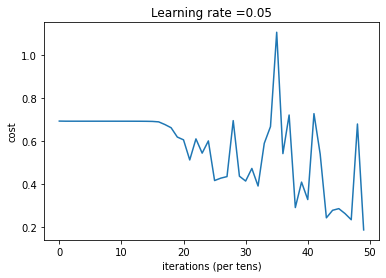

In [ ]:
parameters1 = L_layer_model(train_X, train_y, layers_dims=layers_dims, learning_rate=0.05, num_iterations = 5000, print_cost = True)

In [ ]:
print(predict(train_X, train_y, parameters1))

Accuracy: 0.9960000000000003
[[0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
  1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
  1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.
  0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
  1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
  0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
  1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0.
  0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1.
  1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
  1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
  0. 0. 1